In [1]:
#importing necessary packages for our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.impute import SimpleImputer,MissingIndicator #Handling missing values
from imblearn.over_sampling import SMOTE
import shap

In [2]:
#Reading and loading the CSV file
df=pd.read_csv("AAPL_stock.csv")

In [3]:
# Printing the dataframe
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092774,73449600
...,...,...,...,...,...,...,...
10095,12/24/2020,131.320007,133.460007,131.100006,131.970001,130.802338,54930100
10096,12/28/2020,133.990005,137.339996,133.509995,136.690002,135.480591,124486200
10097,12/29/2020,138.050003,138.789993,134.339996,134.869995,133.676666,121047300
10098,12/30/2020,135.580002,135.990005,133.399994,133.720001,132.536865,96452100


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10100 entries, 1980-12-12 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10100 non-null  float64
 1   High       10100 non-null  float64
 2   Low        10100 non-null  float64
 3   Close      10100 non-null  float64
 4   Adj Close  10100 non-null  float64
 5   Volume     10100 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 810.4 KB


In [4]:
## Basic stats for Apple's stock:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10100.000000,10100.000000,10100.000000,10100.000000,10100.000000,1.010000e+04
mean,9.928018,10.034979,9.819790,9.931304,9.296735,3.395424e+08
std,19.536066,19.764199,19.305401,19.544381,19.028568,3.417893e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.272321,0.279018,0.265625,0.271763,0.228537,1.307675e+08
50%,0.441964,0.449799,0.433036,0.443482,0.368089,2.269008e+08
75%,11.493928,11.557410,11.395089,11.476964,9.813011,4.223982e+08
max,138.050003,138.789993,134.339996,136.690002,135.480591,7.421641e+09


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/12/1980,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,12/15/1980,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,12/16/1980,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,12/17/1980,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,12/18/1980,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10095,12/24/2020,131.320007,133.460007,131.100006,131.970001,130.802338,54930100
10096,12/28/2020,133.990005,137.339996,133.509995,136.690002,135.480591,124486200
10097,12/29/2020,138.050003,138.789993,134.339996,134.869995,133.676666,121047300
10098,12/30/2020,135.580002,135.990005,133.399994,133.720001,132.536865,96452100
10099,12/31/2020,134.080002,134.740005,131.720001,132.690002,131.515991,99116600


In [7]:
apple=df

In [8]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10100 entries, 0 to 10099
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10100 non-null  object 
 1   Open       10100 non-null  float64
 2   High       10100 non-null  float64
 3   Low        10100 non-null  float64
 4   Close      10100 non-null  float64
 5   Adj Close  10100 non-null  float64
 6   Volume     10100 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.5+ KB


In [9]:
apple['Date']=pd.to_datetime(apple.Date,infer_datetime_format=True)

In [10]:
#Set the date as index
apple.set_index('Date',inplace=True)

In [11]:
apple.index.nunique()

10100

In [12]:
apple.sort_index(axis='index',inplace=True)

In [13]:
# Get the last business day of each month
#Doing resample for time series data for the last day of month

last_business_day =apple.resample('M').last()

In [14]:
last_business_day

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.118908,35750400
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.098436,46188800
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.092339,14761600
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085370,15993600
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.098872,12611200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.677994,225702700
2020-09-30,113.790001,117.260002,113.620003,115.809998,114.587624,142675200
2020-10-31,111.059998,111.989998,107.720001,108.860001,107.710983,190272600


In [15]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10100 entries, 1980-12-12 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10100 non-null  float64
 1   High       10100 non-null  float64
 2   Low        10100 non-null  float64
 3   Close      10100 non-null  float64
 4   Adj Close  10100 non-null  float64
 5   Volume     10100 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 810.4 KB


In [16]:
apple.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<AxesSubplot:xlabel='Date'>

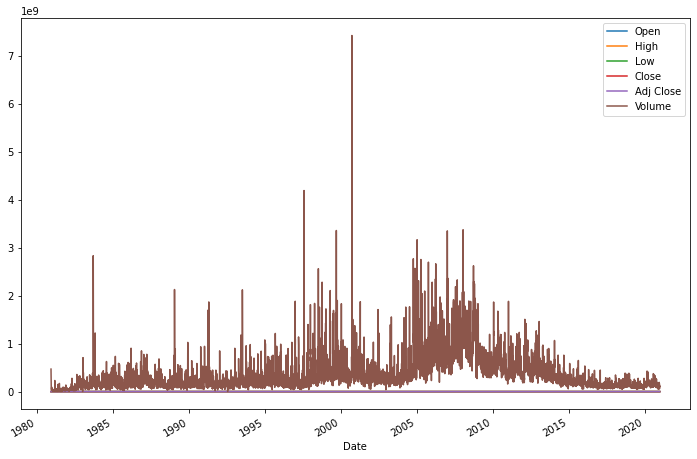

In [17]:
apple.columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
apple.plot(figsize=(12,8))

In [18]:
last_business_day['Close_LastMonth']=last_business_day['Close'].shift(+1)
last_business_day['Close_2Monthsback']=last_business_day['Close'].shift(+2)
last_business_day['Close_3Monthsback']=last_business_day['Close'].shift(+3)
last_business_day['Close_4Monthsback']=last_business_day['Close'].shift(+4)

In [19]:
last_business_day

,Open,High,Low,Close,Adj Close,Volume,Close_LastMonth,Close_2Monthsback,Close_3Monthsback,Close_4Monthsback
Date,,,,,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.118908,35750400,NaN,NaN,NaN,NaN
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.098436,46188800,0.152344,NaN,NaN,NaN
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.092339,14761600,0.126116,0.152344,NaN,NaN
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085370,15993600,0.118304,0.126116,0.152344,NaN
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.098872,12611200,0.109375,0.118304,0.126116,0.152344
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.677994,225702700,106.260002,91.199997,79.485001,73.449997
2020-09-30,113.790001,117.260002,113.620003,115.809998,114.587624,142675200,129.039993,106.260002,91.199997,79.485001
2020-10-31,111.059998,111.989998,107.720001,108.860001,107.710983,190272600,115.809998,129.039993,106.260002,91.199997


### Timeseries Univariate using Logistic Regression and Random Regressor

### After dataset is ready input is close 1month,2 month,3 month input data we will be predicting the data in any month

## Now using LinearRegreesion and Random forest classifier considering Close parameter and lags of months 1,2 and 3

In [20]:
last_business_day

,Open,High,Low,Close,Adj Close,Volume,Close_LastMonth,Close_2Monthsback,Close_3Monthsback,Close_4Monthsback
Date,,,,,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.118908,35750400,NaN,NaN,NaN,NaN
1981-01-31,0.127232,0.127232,0.126116,0.126116,0.098436,46188800,0.152344,NaN,NaN,NaN
1981-02-28,0.118304,0.119420,0.118304,0.118304,0.092339,14761600,0.126116,0.152344,NaN,NaN
1981-03-31,0.110491,0.110491,0.109375,0.109375,0.085370,15993600,0.118304,0.126116,0.152344,NaN
1981-04-30,0.126674,0.127790,0.126674,0.126674,0.098872,12611200,0.109375,0.118304,0.126116,0.152344
...,...,...,...,...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.677994,225702700,106.260002,91.199997,79.485001,73.449997
2020-09-30,113.790001,117.260002,113.620003,115.809998,114.587624,142675200,129.039993,106.260002,91.199997,79.485001
2020-10-31,111.059998,111.989998,107.720001,108.860001,107.710983,190272600,115.809998,129.039993,106.260002,91.199997


In [21]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [23]:
import numpy as np
x1,x2,x3,x20,y=last_business_day['Close_LastMonth'],last_business_day['Close_2Monthsback'],last_business_day['Close_3Monthsback'],last_business_day['Close_4Monthsback'],last_business_day['Close']
x1,x2,x3,x20,y=np.array(x1),np.array(x2),np.array(x3),np.array(x20),np.array(y)
x1,x2,x3,x20,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),x20.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3,x20),axis=1)
print(final_x)

[[           nan            nan            nan            nan]
 [1.52344000e-01            nan            nan            nan]
 [1.26116000e-01 1.52344000e-01            nan            nan]
 ...
 [1.15809998e+02 1.29039993e+02 1.06260002e+02 9.11999970e+01]
 [1.08860001e+02 1.15809998e+02 1.29039993e+02 1.06260002e+02]
 [1.19050003e+02 1.08860001e+02 1.15809998e+02 1.29039993e+02]]


In [24]:
Final = np.nan_to_num(final_x)

In [25]:
final_y = np.nan_to_num(y)

In [26]:
Final.shape

(481, 4)

In [27]:
X_train,X_test,y_train,y_test=Final[:-30],Final[-30:],final_y[:-30],final_y[-30:]



In [28]:
model.fit(X_train,y_train.ravel())
lin_model.fit(X_train,y_train.ravel())

LinearRegression()

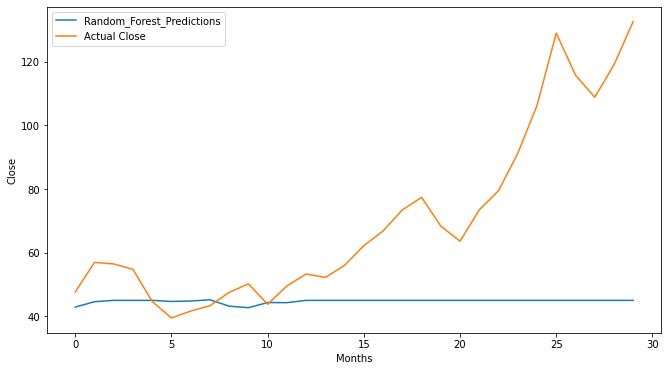

In [29]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Close')
plt.xlabel('Months')
plt.ylabel('Close')
plt.legend(loc="upper left")
plt.show()

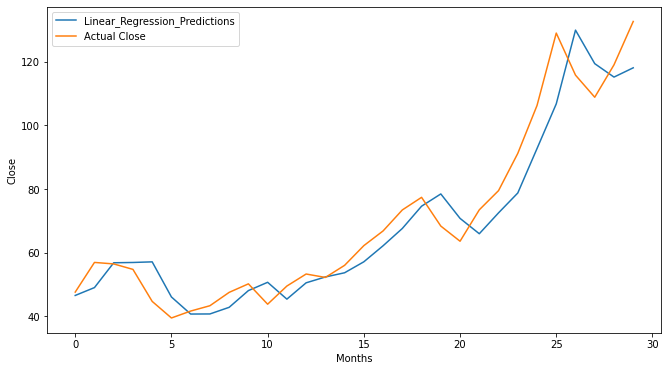

In [30]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Close')
plt.xlabel('Months')
plt.ylabel('Close')
plt.legend(loc="upper left")
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))


In [32]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)
print("R2 score for Random Regression for months =", round(sm.r2_score(y_test, pred), 2))
print("R2 score for Linear Regression for months =", round(sm.r2_score(y_test, lin_pred), 2))

Mean Squared Error for Random Forest Model is: 37.219064236960484
Mean Squared Error for Linear Regression Model is: 8.368072258471093
R2 score for Random Regression for months = -0.85
R2 score for Linear Regression for months = 0.91


######  An R2 score near 1 means that the model is able to predict the data very well 
Linear Regression model performance betters

### Case2: 

### Time series data univariate open parameter: last date of the year

In [33]:

last_business_day_year =apple.resample('Y').last()

In [34]:
last_business_day_year

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.118908,35750400
1981-12-31,0.098772,0.099330,0.098772,0.098772,0.077094,54656000
1982-12-31,0.133929,0.135603,0.133371,0.133371,0.104099,49660800
1983-12-31,0.108817,0.111607,0.108259,0.108817,0.084934,91862400
1984-12-31,0.130022,0.130580,0.130022,0.130022,0.101485,207760000
1985-12-31,0.099330,0.099888,0.098214,0.098214,0.076658,87248000
1986-12-31,0.183036,0.184710,0.180246,0.180804,0.141122,132563200
1987-12-31,0.379464,0.383929,0.373884,0.375000,0.294160,117600000
1988-12-31,0.361607,0.368304,0.359375,0.359375,0.284300,81692800


In [35]:
last_business_day_year['Close_LastYear']=last_business_day_year['Close'].shift(+1)
last_business_day_year['Close_SecondLastYear']=last_business_day_year['Close'].shift(+2)
last_business_day_year['Close_ThirdlastYear']=last_business_day_year['Close'].shift(+3)
last_business_day_year['Close_Fourthyear']=last_business_day_year['Close'].shift(+4)

In [36]:
last_business_day_year

,Open,High,Low,Close,Adj Close,Volume,Close_LastYear,Close_SecondLastYear,Close_ThirdlastYear,Close_Fourthyear
Date,,,,,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.118908,35750400,NaN,NaN,NaN,NaN
1981-12-31,0.098772,0.099330,0.098772,0.098772,0.077094,54656000,0.152344,NaN,NaN,NaN
1982-12-31,0.133929,0.135603,0.133371,0.133371,0.104099,49660800,0.098772,0.152344,NaN,NaN
1983-12-31,0.108817,0.111607,0.108259,0.108817,0.084934,91862400,0.133371,0.098772,0.152344,NaN
1984-12-31,0.130022,0.130580,0.130022,0.130022,0.101485,207760000,0.108817,0.133371,0.098772,0.152344
1985-12-31,0.099330,0.099888,0.098214,0.098214,0.076658,87248000,0.130022,0.108817,0.133371,0.098772
1986-12-31,0.183036,0.184710,0.180246,0.180804,0.141122,132563200,0.098214,0.130022,0.108817,0.133371
1987-12-31,0.379464,0.383929,0.373884,0.375000,0.294160,117600000,0.180804,0.098214,0.130022,0.108817
1988-12-31,0.361607,0.368304,0.359375,0.359375,0.284300,81692800,0.375000,0.180804,0.098214,0.130022


In [37]:
last_business_day_year.shape

(41, 10)

In [38]:
from sklearn.linear_model import LinearRegression
lin_model2=LinearRegression()

In [39]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=100,max_features=4, random_state=1)

In [40]:
import numpy as np
x8,x9,x10,x11,y2=last_business_day_year['Close_LastYear'],last_business_day_year['Close_SecondLastYear'],last_business_day_year['Close_ThirdlastYear'],last_business_day_year['Close_Fourthyear'],last_business_day_year['Close']
x8,x9,x10,x11,y2=np.array(x8),np.array(x9),np.array(x10),np.array(x11),np.array(y2)
x8,x9,x10,x11,y2=x8.reshape(-1,1),x9.reshape(-1,1),x10.reshape(-1,1),x11.reshape(-1,1),y2.reshape(-1,1)
final_x2=np.concatenate((x8,x9,x10,x11),axis=1)
print(final_x2)

[[      nan       nan       nan       nan]
 [ 0.152344       nan       nan       nan]
 [ 0.098772  0.152344       nan       nan]
 [ 0.133371  0.098772  0.152344       nan]
 [ 0.108817  0.133371  0.098772  0.152344]
 [ 0.130022  0.108817  0.133371  0.098772]
 [ 0.098214  0.130022  0.108817  0.133371]
 [ 0.180804  0.098214  0.130022  0.108817]
 [ 0.375     0.180804  0.098214  0.130022]
 [ 0.359375  0.375     0.180804  0.098214]
 [ 0.314732  0.359375  0.375     0.180804]
 [ 0.383929  0.314732  0.359375  0.375   ]
 [ 0.503348  0.383929  0.314732  0.359375]
 [ 0.533482  0.503348  0.383929  0.314732]
 [ 0.261161  0.533482  0.503348  0.383929]
 [ 0.348214  0.261161  0.533482  0.503348]
 [ 0.284598  0.348214  0.261161  0.533482]
 [ 0.186384  0.284598  0.348214  0.261161]
 [ 0.117188  0.186384  0.284598  0.348214]
 [ 0.365513  0.117188  0.186384  0.284598]
 [ 0.917969  0.365513  0.117188  0.186384]
 [ 0.265625  0.917969  0.365513  0.117188]
 [ 0.391071  0.265625  0.917969  0.365513]
 [ 0.255893

In [41]:
Final2 = np.nan_to_num(final_x2)

In [42]:
final_y2 = np.nan_to_num(y2)

In [43]:
X_train2,X_test2,y_train2,y_test2=Final2[:-30],Final2[-30:],final_y2[:-30],final_y2[-30:]


In [44]:
X_train2.shape

(11, 4)

In [45]:
y_train2.shape

(11, 1)

In [46]:
y_test2.shape

(30, 1)

In [47]:
X_test2.shape

(30, 4)

In [48]:
model2.fit(X_train2,y_train2.ravel())
lin_model2.fit(X_train2,y_train2.ravel())

LinearRegression()

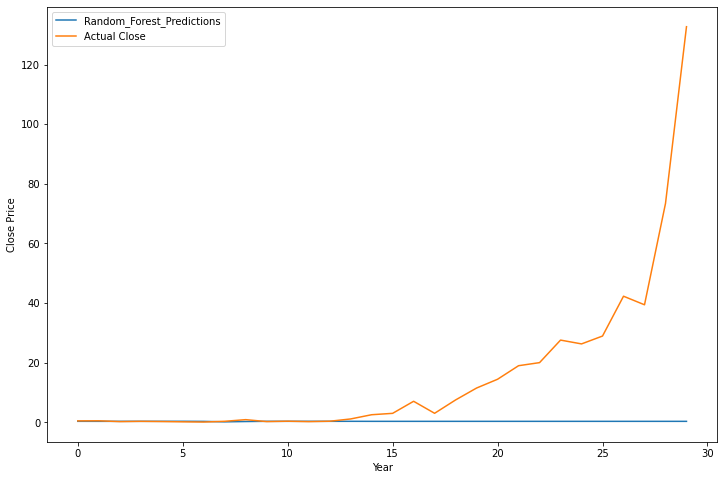

In [49]:
pred2=model2.predict(X_test2)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred2,label='Random_Forest_Predictions')
plt.plot(y_test2,label='Actual Close')
plt.legend(loc="upper left")
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()


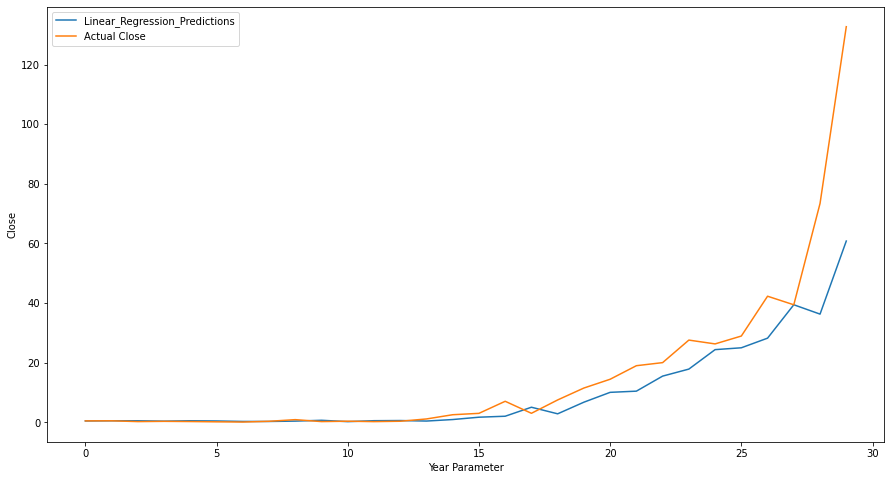

In [50]:
lin_pred2=lin_model2.predict(X_test2)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(lin_pred2,label='Linear_Regression_Predictions')
plt.plot(y_test2,label='Actual Close')
plt.xlabel('Year Parameter')
plt.ylabel('Close')
plt.legend(loc="upper left")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf2=sqrt(mean_squared_error(pred2,y_test2))
rmse_lr2=sqrt(mean_squared_error(lin_pred2,y_test2))

In [52]:
print('Mean Squared Error for Random Forest Model  for Case 2is:',rmse_rf2)
print('Mean Squared Error for Linear Regression Model for Case 2 is:',rmse_lr2)
print("R2 score for Random Regression for Year =", round(sm.r2_score(y_test2, pred2), 2))
print("R2 score for Linear Regression for Year =", round(sm.r2_score(y_test2, lin_pred2), 2))

Mean Squared Error for Random Forest Model  for Case 2is: 31.385562798499308
Mean Squared Error for Linear Regression Model for Case 2 is: 15.326274870261829
R2 score for Random Regression for Year = -0.3
R2 score for Linear Regression for Year = 0.69


### Case 3: Doing for week analysis

In [53]:
week_data=apple.resample('W').last()

In [54]:
week_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-14,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-21,0.126116,0.126674,0.126116,0.126116,0.098436,48630400
1980-12-28,0.158482,0.159040,0.158482,0.158482,0.123699,55574400
1981-01-04,0.154018,0.155134,0.154018,0.154018,0.120214,21660800
1981-01-11,0.142299,0.142857,0.142299,0.142299,0.111068,21504000
...,...,...,...,...,...,...
2020-12-06,122.599998,122.860001,121.519997,122.250000,121.168335,78260400
2020-12-13,122.430000,122.760002,120.550003,122.410004,121.326927,86939800
2020-12-20,128.960007,129.100006,126.120003,126.660004,125.539330,192541500


In [55]:
week_data['Close_LastWeek']=week_data['Close'].shift(+1)
week_data['Close_SecondLastWeek']=week_data['Close'].shift(+2)
week_data['Close_ThirdlastWeek']=last_business_day_year['Close'].shift(+3)
week_data['Close_FourthlastWeek']=last_business_day_year['Close'].shift(+4)

In [56]:
week_data

,Open,High,Low,Close,Adj Close,Volume,Close_LastWeek,Close_SecondLastWeek,Close_ThirdlastWeek,Close_FourthlastWeek
Date,,,,,,,,,,
1980-12-14,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,NaN,NaN,NaN,NaN
1980-12-21,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,0.128348,NaN,NaN,NaN
1980-12-28,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,0.126116,0.128348,NaN,NaN
1981-01-04,0.154018,0.155134,0.154018,0.154018,0.120214,21660800,0.158482,0.126116,NaN,NaN
1981-01-11,0.142299,0.142857,0.142299,0.142299,0.111068,21504000,0.154018,0.158482,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-12-06,122.599998,122.860001,121.519997,122.250000,121.168335,78260400,116.589996,117.339996,NaN,NaN
2020-12-13,122.430000,122.760002,120.550003,122.410004,121.326927,86939800,122.250000,116.589996,NaN,NaN
2020-12-20,128.960007,129.100006,126.120003,126.660004,125.539330,192541500,122.410004,122.250000,NaN,NaN


In [57]:
week_data.shape

(2091, 10)

In [58]:
from sklearn.linear_model import LinearRegression
lin_model3=LinearRegression()

In [59]:
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(n_estimators=100,max_features=4, random_state=1)

In [60]:
import numpy as np
x12,x13,x14,x15,y3=week_data['Close_LastWeek'],week_data['Close_SecondLastWeek'],week_data['Close_ThirdlastWeek'],week_data['Close_FourthlastWeek'],week_data['Close']
x12,x13,x14,x15,y3=np.array(x12),np.array(x13),np.array(x14),np.array(x15),np.array(y3)
x12,x13,x14,x15,y3=x12.reshape(-1,1),x13.reshape(-1,1),x14.reshape(-1,1),x15.reshape(-1,1),y3.reshape(-1,1)
final_x3=np.concatenate((x12,x13,x14,x15),axis=1)
print(final_x3)

[[           nan            nan            nan            nan]
 [1.28348000e-01            nan            nan            nan]
 [1.26116000e-01 1.28348000e-01            nan            nan]
 ...
 [1.22410004e+02 1.22250000e+02            nan            nan]
 [1.26660004e+02 1.22410004e+02            nan            nan]
 [1.31970001e+02 1.26660004e+02            nan            nan]]


In [61]:
Final3 = np.nan_to_num(final_x3)

In [62]:
final_y3 = np.nan_to_num(y3)

In [63]:
X_train3,X_test3,y_train3,y_test3=Final3[:-30],Final3[-30:],final_y3[:-30],final_y3[-30:]

In [64]:
X_train3.shape

(2061, 4)

In [65]:
X_test3.shape

(30, 4)

In [66]:
y_train3.shape

(2061, 1)

In [67]:
y_test3.shape

(30, 1)

In [68]:
model3.fit(X_train3,y_train3.ravel())
lin_model3.fit(X_train3,y_train3.ravel())

LinearRegression()

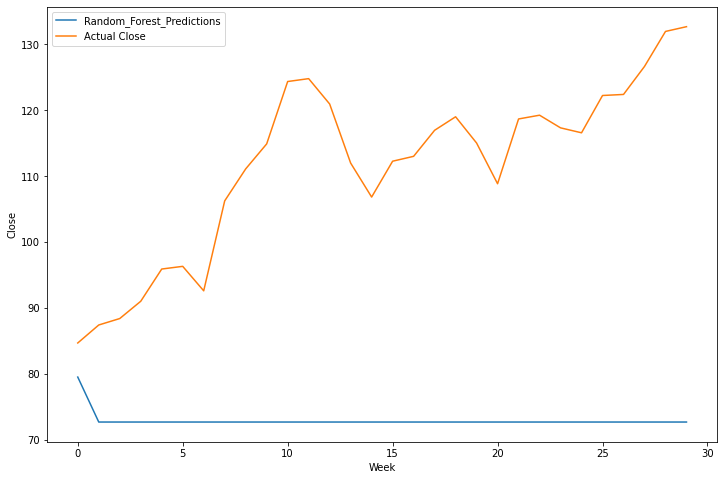

In [69]:
pred3=model3.predict(X_test3)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred3,label='Random_Forest_Predictions')
plt.plot(y_test3,label='Actual Close')
plt.xlabel('Week')
plt.ylabel('Close')
plt.legend(loc="upper left")
plt.show()

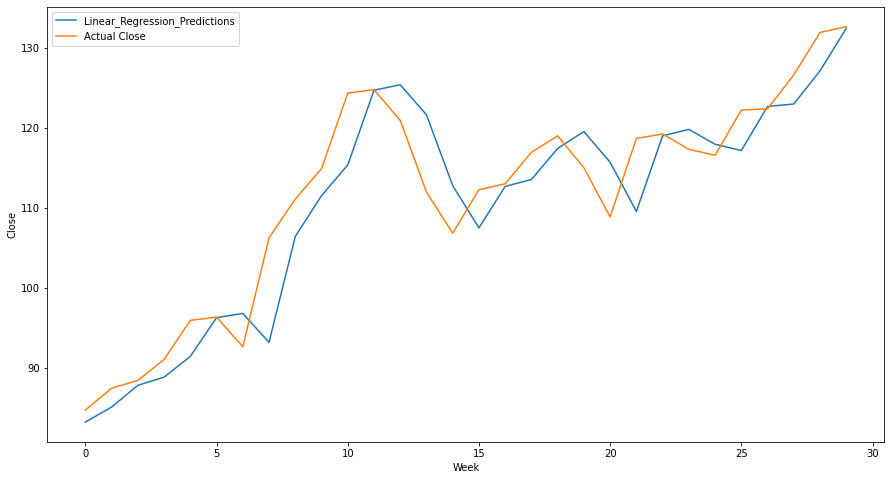

In [70]:
lin_pred3=lin_model3.predict(X_test3)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(lin_pred3,label='Linear_Regression_Predictions')
plt.plot(y_test3,label='Actual Close')
plt.xlabel('Week')
plt.ylabel('Close')
plt.legend(loc="upper left")
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf3=sqrt(mean_squared_error(pred3,y_test3))
rmse_lr3=sqrt(mean_squared_error(lin_pred3,y_test3))

In [72]:
print('Mean Squared Error for Random Forest Model  for Case 2 is:',rmse_rf3)
print('Mean Squared Error for Linear Regression Model for Case 2 is:',rmse_lr3)
print("R2 score for Random Regression for Week =", round(sm.r2_score(y_test3, pred3), 2))
print("R2 score for Linear Regression for Week =", round(sm.r2_score(y_test3, lin_pred3), 2))

Mean Squared Error for Random Forest Model  for Case 2 is: 41.095124984302224
Mean Squared Error for Linear Regression Model for Case 2 is: 4.976492478717951
R2 score for Random Regression for Week = -8.77
R2 score for Linear Regression for Week = 0.86


### LSTM

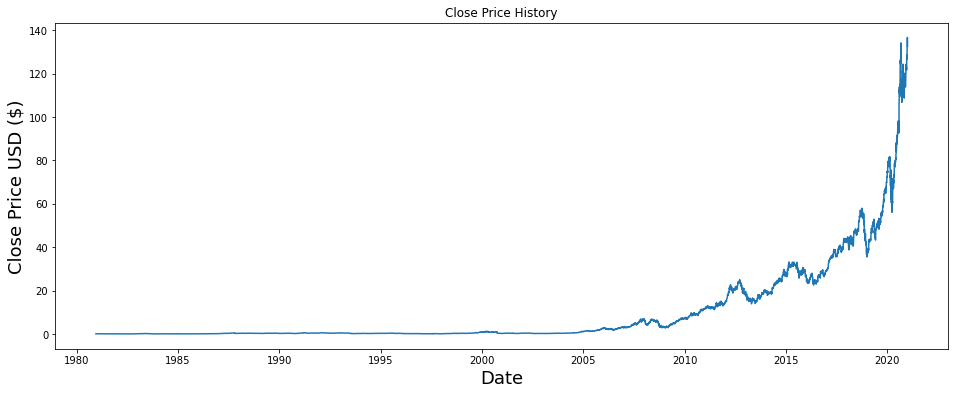

In [73]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


In [74]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

9595

In [75]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.79921553e-04],
       [5.30917190e-04],
       [4.65570721e-04],
       ...,
       [9.86680364e-01],
       [9.78264187e-01],
       [9.70726187e-01]])

In [76]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
       
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00057992, 0.00053092, 0.00046557, 0.00048599, 0.0005105 ,
       0.00056359, 0.00060851, 0.00064935, 0.00070244, 0.00080046,
       0.00081679, 0.0007882 , 0.00075554, 0.00076779, 0.00074328,
       0.00069427, 0.00064935, 0.00062893, 0.00068202, 0.00067385,
       0.0006371 , 0.00064118, 0.0006616 , 0.00065344, 0.00071469,
       0.00068202, 0.00070244, 0.00071469, 0.00071061, 0.00069427,
       0.0006861 , 0.00065344, 0.00061668, 0.00056359, 0.0005105 ,
       0.00054317, 0.00057584, 0.00057584, 0.00057992, 0.00053092,
       0.00053092, 0.00050233, 0.00049416, 0.00047374, 0.00049416,
       0.00053092, 0.00047782, 0.0004329 , 0.00044515, 0.00041657,
       0.00046557, 0.00047782, 0.00050642, 0.0005105 , 0.00049825,
       0.00049007, 0.00048599, 0.00047782, 0.00041248, 0.00037572])]
[0.000347136192279771]

[array([0.00057992, 0.00053092, 0.00046557, 0.00048599, 0.0005105 ,
       0.00056359, 0.00060851, 0.00064935, 0.00070244, 0.00080046,
       0.00081679, 0.0007882 , 0.0

In [77]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

9535/9535 [==============================] - 177s 18ms/step - loss: 1.1775e-04


In [78]:
 #Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.385663711832501


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


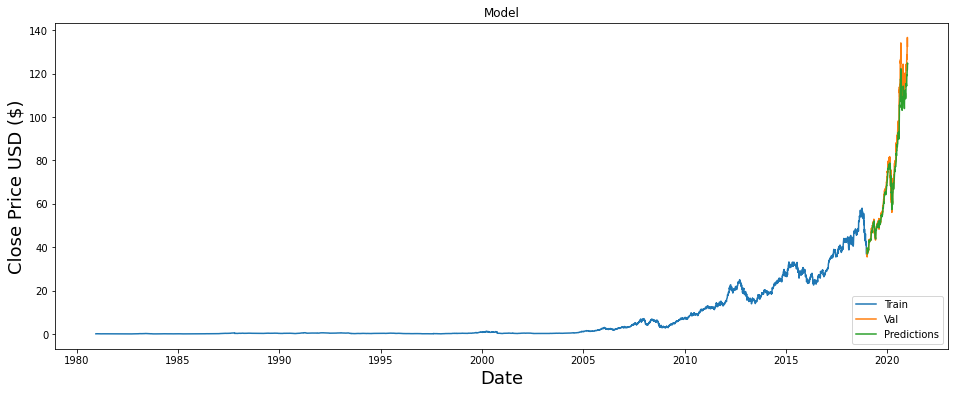

In [79]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### LSTM of nichekete

In [80]:
last_business_day_year.head()

,Open,High,Low,Close,Adj Close,Volume,Close_LastYear,Close_SecondLastYear,Close_ThirdlastYear,Close_Fourthyear
Date,,,,,,,,,,
1980-12-31,0.152902,0.152902,0.152344,0.152344,0.118908,35750400,NaN,NaN,NaN,NaN
1981-12-31,0.098772,0.099330,0.098772,0.098772,0.077094,54656000,0.152344,NaN,NaN,NaN
1982-12-31,0.133929,0.135603,0.133371,0.133371,0.104099,49660800,0.098772,0.152344,NaN,NaN
1983-12-31,0.108817,0.111607,0.108259,0.108817,0.084934,91862400,0.133371,0.098772,0.152344,NaN
1984-12-31,0.130022,0.130580,0.130022,0.130022,0.101485,207760000,0.108817,0.133371,0.098772,0.152344


<AxesSubplot:xlabel='Date'>

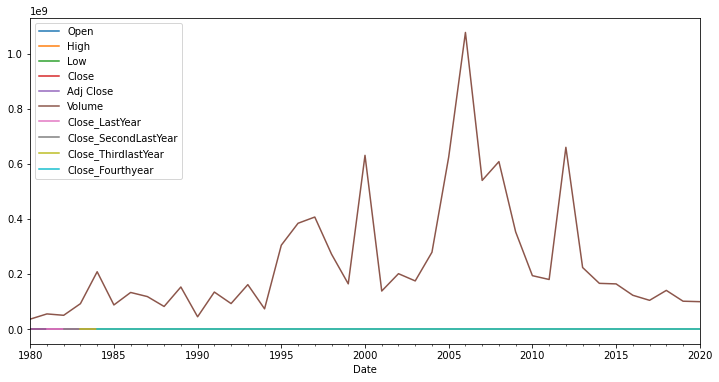

In [81]:
last_business_day_year.plot(figsize=(12,6))

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

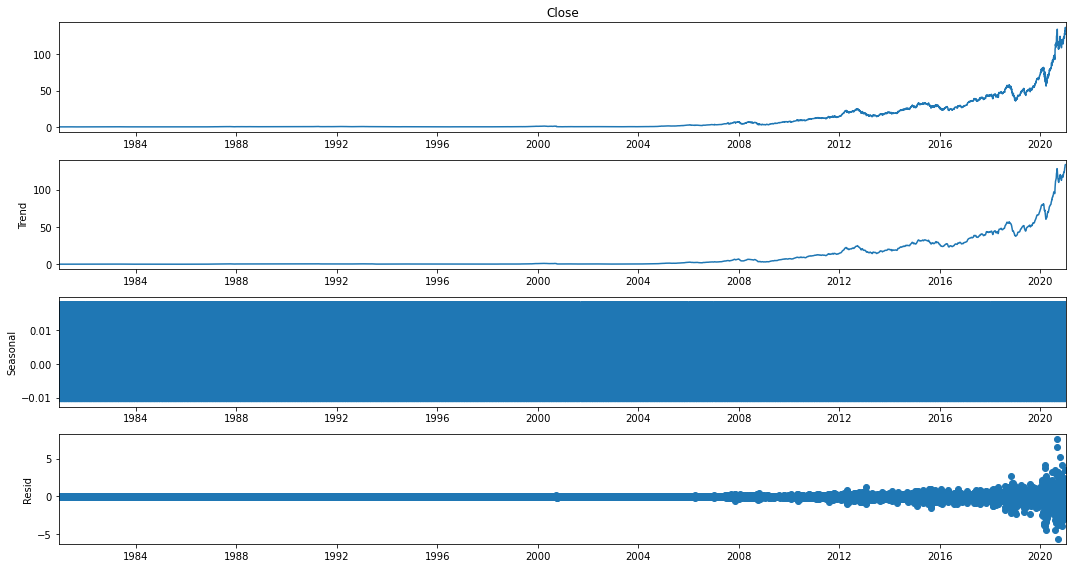

In [83]:
results = seasonal_decompose(apple['Close'],period=7)
results.plot();   

##### apple

In [84]:
#length of dataset
len(last_business_day_year)

41

In [85]:
# diving the years into tesr and train :
#taking last 5 years in test


train = last_business_day_year.iloc[:36]
test = last_business_day_year.iloc[36:]

In [86]:
train1 = np.nan_to_num(train)

test1 = np.nan_to_num(test)

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [88]:
last_business_day_year.head(),last_business_day_year.tail()

(                Open      High       Low     Close  Adj Close     Volume  \
 Date                                                                       
 1980-12-31  0.152902  0.152902  0.152344  0.152344   0.118908   35750400   
 1981-12-31  0.098772  0.099330  0.098772  0.098772   0.077094   54656000   
 1982-12-31  0.133929  0.135603  0.133371  0.133371   0.104099   49660800   
 1983-12-31  0.108817  0.111607  0.108259  0.108817   0.084934   91862400   
 1984-12-31  0.130022  0.130580  0.130022  0.130022   0.101485  207760000   
 
             Close_LastYear  Close_SecondLastYear  Close_ThirdlastYear  \
 Date                                                                    
 1980-12-31             NaN                   NaN                  NaN   
 1981-12-31        0.152344                   NaN                  NaN   
 1982-12-31        0.098772              0.152344                  NaN   
 1983-12-31        0.133371              0.098772             0.152344   
 1984-12-31    

In [89]:
scaler.fit(train1)
scaled_train = scaler.transform(train1)
scaled_test = scaler.transform(test1)

In [90]:
scaled_train[:10]

array([[1.92590767e-03, 1.90085082e-03, 1.97164115e-03, 1.96859378e-03,
        1.70098161e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.03246954e-05, 2.02932816e-05,
        1.75533250e-05, 1.81666043e-02, 5.52071047e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.25086155e-03, 1.28704476e-03, 1.28056508e-03, 1.27858584e-03,
        1.10477246e-03, 1.33666603e-02, 3.57934421e-03, 7.60335126e-03,
        0.00000000e+00, 0.00000000e+00],
       [3.57394098e-04, 4.35614604e-04, 3.65880941e-04, 3.85608718e-04,
        3.33191095e-04, 5.39186539e-02, 4.83315836e-03, 4.92962119e-03,
        8.01554409e-03, 0.00000000e+00],
       [1.11185322e-03, 1.10881782e-03, 1.15858049e-03, 1.15678978e-03,
        9.99533025e-04, 1.65285965e-01, 3.94335945e-03, 6.65642599e-03,
        5.19686578e-03, 1.05324245e-02],
       [1.98532510e-05, 1.97990510e-05, 0.00000000e+00, 0.00000000e+00,
   

In [91]:
## we are using batches of 5 years in lstm


from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 5
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [92]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[1.92590767e-03 1.90085082e-03 1.97164115e-03 1.96859378e-03
 1.70098161e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.03246954e-05 2.02932816e-05 1.75533250e-05 1.81666043e-02
 5.52071047e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.25086155e-03 1.28704476e-03 1.28056508e-03 1.27858584e-03
 1.10477246e-03 1.33666603e-02 3.57934421e-03 7.60335126e-03
 0.00000000e+00 0.00000000e+00 3.57394098e-04 4.35614604e-04
 3.65880941e-04 3.85608718e-04 3.33191095e-04 5.39186539e-02
 4.83315836e-03 4.92962119e-03 8.01554409e-03 0.00000000e+00
 1.11185322e-03 1.10881782e-03 1.15858049e-03 1.15678978e-03
 9.99533025e-04 1.65285965e-01 3.94335945e-03 6.65642599e-03
 5.19686578e-03 1.05324245e-02]
Predict this y: 
 [[1.98532510e-05 1.97990510e-05 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.94846248e-02 4.71179579e-03 5.43095805e-03
  7.01728411e-03 6.82868135e-03]]


In [93]:
X.shape

(1, 5, 10)

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [95]:
y.shape

(1, 10)

In [96]:
# define model
model4 = Sequential()
model4.add(LSTM(32, activation='relu', input_shape=(n_input, n_features)))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')

In [97]:
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 32)                4352      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
